In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [102]:
np.random.seed(0)


In [103]:
# Generating a dataset using scikit learn
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, n_samples=100, n_clusters_per_class=1)
# Output of the features in standard axes %\mu$ and $\sigma^2 = 0$. Scaling the data to have the desired std and mean.
X[:,0] = np.abs(X[:,0] * 0.5 + 5)
X[:,1] = np.abs(X[:,1] * 30 + 160)

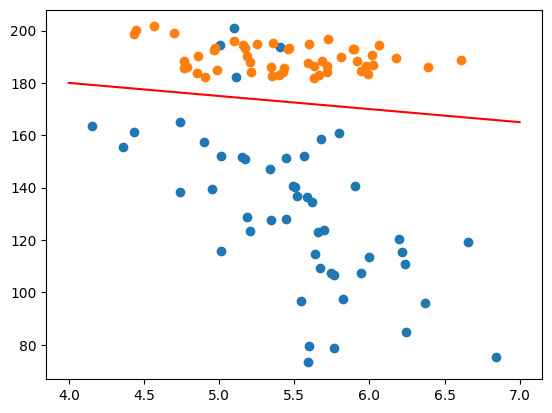

In [104]:
# Plotting the dataset, with each class in a different color
fig, ax = plt.subplots()
ax.scatter(X[y==0, 0], X[y==0, 1])
ax.scatter(X[y==1, 0], X[y==1, 1])
#Estimating pqrameters of the linear separation line
x1 = np.linspace(4,7,100)
x2 = x1*-5 + 200
ax.plot(x1, x2, color='red')
plt.show()

In [105]:
#function ge_cov generates a covariance matrix with the desired standard deviations and rotation angle
def get_cov(sdx=0.1, sdy=2, rotangdeg=45):
    covar = np.array([[sdx**2, 0], [0, sdy**2]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = [[np.cos(rot_ang),-np.sin(rot_ang)],[np.sin(rot_ang),np.cos(rot_ang)]]
    
    covar = np.matmul(np.matmul(rot_mat, covar), np.transpose(rot_mat))
    return covar

covar = get_cov()

In [106]:
#Generating a meshgrid to plot the probability distribution
x1line = np.linspace(-1,1,200)
x2line = np.linspace(-1,1,200)

x1grid, x2grid = np.meshgrid(x1line, x2line)
Xgrid = np.transpose(np.array([x1grid, x2grid]).reshape(2,40000))

In [107]:
#Putting the above in a function for future use
def gen_sample_grid(npx=200, npy=200, limit=1):
    x1line = np.linspace(-limit, limit, npx)
    x2line = np.linspace(-limit, limit, npy)
    x1grid, x2grid = np.meshgrid(x1line, x2line)
    Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
    return Xgrid,x1line,x2line

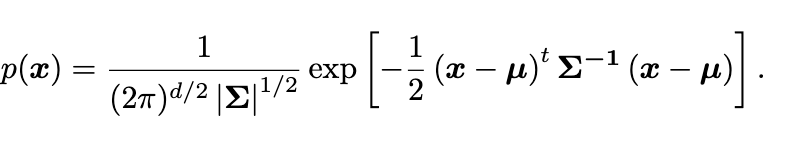

In [108]:

p = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar))) * np.exp(
-1 / 2 * (np.matmul(Xgrid, np.linalg.inv(covar)) * Xgrid).sum(-1))

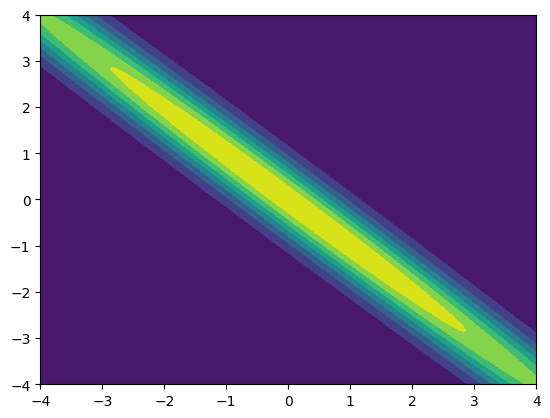

In [109]:
p_reshaped = np.reshape(p, [200, 200])
plt.contourf(4*x1line, 4*x2line, p_reshaped)



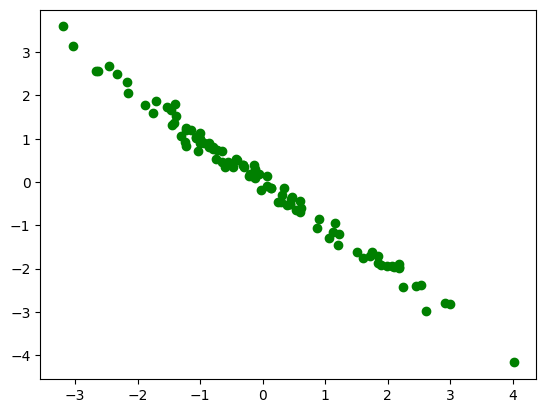

In [110]:
q = np.random.multivariate_normal([0,0], covar, 100)
plt.scatter(q[:,0], q[:,1], color='green')
